# Criando seu próprio Classificador de Objetos

##  Hora de nos conhecermos um pouco

Como vocês estão hoje?

Este aqui é um curso bem rápido de visão computacional onde vamos criar juntos um Classificador de Objetos! Antes de começar a parte de código, deixa eu me apresentar rapidamente 


Meu nome é Clarissa Lima, sou estudante de Sistemas de Informação pela UFMG e estudante de Engenharia de Controle e Automação pela PUC MINAS. Meu interesse pela área de Machine Learning e Visão Computacional começou em 2018, quando entrei no laboratório de Robótica e Visão Computacional, VerLab. Na época, eu trabalhava com enxames de robôs e via os trabalhos que eram desenvolvidos pelo pessoal de visão e achava super interessante. Bom, mas foi só no meio de 2019 que eu comecei minha jornada em Visão Computacional (Visão Computacional Tradicional) e posteriormente em Visão Computacional Moderna (união com Machine Learning). De 2019 e 2020 eu trabalhei como Desenvolvedora de Machine Learning e Visão Computacional e tive a oportunidade de aprender sobre diversas aplicações e técnicas, atualmente uso o Instagram e o Youtube para compartilhar estes conhecimentos. 

## O QUE É COMPUTAÇÃO VISUAL?

<img src="img/comp_vision2.png" width="800">

A Computação Visual é um conjunto de áreas de pesquisa que estão relacionadas com imagens, vídeos, entre outras estruturas visuais. Resumidamente, podemos entender a diferença entre essas sub áreas ao observarmos seus inputs e outputs. 

Input Imagem -> Output Imagem : Processamento de Imagem <br>
Input Imagem -> Output Informação com alto nível de abstração : Visão Computacional



[Para saber mais!](http://www.ic.uff.br/index.php/pt/pos-graduacao/areas-de-concentracao/29-paginas/96-computacao-visual)



## O QUE É VISÃO COMPUTACIONAL?

![title](img/comp_vision1.png)

Visão Computacional está relacionada a área da computação que tenta analisar imagens e retirar informações de alto nível de abstração destas. 

Que tipo de informação?

<ul>
 <li>Quantidade de pessoas em uma cena</li>
 <li>Informações do tipo objeto identificado</li>
 <li>Classificação de objetos</li>
 </ul>


## Motivação

Classificação de imagens é uma das principais ferramentas da visão computacional utilizadas em aplicações reais. Basicamente temos um algoritmo que aprende a identificar um padrão em determinada estrutura (ou em mais de uma) e consegue assim rotular as imagens conforme o conjunto ao qual elas pertencem. <br>

Uma aplicação que você vai conseguir fazer ainda hoje se quiser, é um sistema simples de identificação de pessoas com máscara e sem máscara. Claro que o programa não vai ser extremamente eficiente, mas com o tempo você vai aprender técnicas para melhorar seus resultados. O importante é ir sempre pra frente, com um passo de cada vez!


![title](img/comp_vision3.png)

## Manipulação de câmera com OpenCV

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [53]:
# Abrir nossa camera
CAMERA = cv2.VideoCapture(2)

while(True):
    # Realizar leitura de frame (vídeo =  conjunto de imagens)
    _, frame = CAMERA.read()

    # Mostrar a imagem na tela
    cv2.imshow("Capturing frames", frame)

    # Apertar 'q' para parar
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

        
# Finalizar
CAMERA.release()
cv2.destroyAllWindows()

Agora vamos criar nosso ROI (Região de Interesse) na tela

In [9]:
# Abrir nossa camera
CAMERA = cv2.VideoCapture(0)

#Aumentar o tamanho da tela
HEIGHT = 800

while(True):
    # Realizar leitura de frame (vídeo =  conjunto de imagens)
    _, frame = CAMERA.read()
    # Inverter nossa tela horizontalmente (nossa cam. inverte)
    frame = cv2.flip(frame, 1)

    # Fazendo um resize do tamanho da tela
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT)
    frame = cv2.resize(frame, (res, HEIGHT))

    # Criar um retangulo para criar nossa área de intersse
    cv2.rectangle(frame, (600, 75), (1000, 425), (255, 0, 255), 5)

    # Mostrar a imagem na tela
    cv2.imshow("Capturing frames", frame)

    # Apertar 'q' para parar
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
# Finalizar
CAMERA.release()
cv2.destroyAllWindows()

Agora vamos salvar nosso frame ("Tirar uma foto")

In [12]:
# Abrir nossa camera
CAMERA = cv2.VideoCapture(0)

#Aumentar o tamanho da tela
HEIGHT = 500

#Lista de frames
RAW_FRAMES = []

while(True):
    # Realizar leitura de frame (vídeo =  conjunto de imagens)
    _, frame = CAMERA.read()
    # Inverter nossa tela horizontalmente (nossa cam. inverte)
    frame = cv2.flip(frame, 1)

    # Fazendo um resize do tamanho da tela
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT)
    frame = cv2.resize(frame, (res, HEIGHT))

   # Criar um retangulo para criar nossa área de intersse
    cv2.rectangle(frame, (300, 75), (650, 425), (255, 0, 255), 5)

    # Mostrar a imagem na tela
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # Nossas opções:
    # q = Sair
    # s = salvar
    
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("s"):
        # salvar frame na lista
        RAW_FRAMES.append(frame)
        
        # converter framde para RGB e mostrar usando o plot (plot = RGB / opencv = BGR)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
        plt.show()
        
# Finalizar
CAMERA.release()
cv2.destroyAllWindows()

In [ ]:
IMAGES = []  # Vamos criar nossa lista de imagens (tirar do frame a área de interesse)

for frame in RAW_FRAMES:
    # Parte1: Pegar nosso ROI (ou seja, a área de interesse)
    roi = frame[75+1:425-1, 300+1:650-1]
    
    # Converter nosso ROI de BGR para RGB (BGR é o formato que o OpenCV lê as imagens)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # Salvamos nossa Região de interesse
    IMAGES.append(roi)
    
    # Mostramos nossa região de interesse na tela \o/
    plt.imshow(roi)
    plt.show()

## Criando nosso dataset


Bom, para treinarmos nosso classificador, vamos precisar inicialmente de ter um conjunto de dados próprios. Podemos fazer de algumas formas:


- Coletar datasets da internet;

- Criar nosso dataset com nosso celular ou câmera;

- Criar nosso dataset usando o OpenCV e a WEB CAM.


Eu vou passar mais detalhes deste último por ser uma forma bem simples de criar um dataset próprio (e divertida). Usei esse formato para poder criar um dataset de roupas. Eu queria criar um projeto de recomendação de roupas com base no meu ármario (sou péssima escolhendo roupas, e já que meu senso de moda é horrível colocar uma máquina para escolher para mim seria pelo menos uma forma rápida de escolher minhas roupas rsrsrs ). 

Meu problema era: Preciso de uma forma de posicionar a câmera longe de mim, mas ainda consegui ver o que ela estava registrando. Quando estivesse na posição correta, ela tiraria a foto.

A forma que encontrei de fazer isso foi criar uma região de interesse chamada ROI dentro da área da câmera. A segunda parte foi desenvolver um sistema que automaticamente já separasse as imagens por sua categoria (para isso bastava eu clicar no botão 1 ao 10 que automaticamente a foto era capturada e salva na pasta de destino). 


### Informações importantes sobre a criação de dataset


Dataset ruins = Treinamento Ruim


Precisamos sempre estar atentos ao nosso dataset. Por este motivo, os passos de pré processamento de datasets são tão importantes. Diferentemente de quando estamos em data science e temos nossos dados em uma tabela, aqui nossos dados são imagens. Infelizmente, com poucas imagens não conseguimos representar de forma adequada o mundo real. Imagina que você passa para um programa milhares de imagens de carros, todas com o carro de lado. Quando você testar seu algoritmo, certamente terá uns resultados bacanas neste tipo de posicionamento de veículo.

Mas e se ....

Um carro se posiciona em frente a sua câmera? Agora seu algoritmo não está mais vendo as portas, nem as duas rodas, nem nada que ele tinha aprendido. Mesmo sendo o mesmo carro, seu algoritmo não é capaz de dizer que aquilo é um carro.


É bem fácil imaginar um dataset que tenta ter uma grande variedade de imagens de carros. E você deve estar pensando? Exemplo ruim Clarissa... Bom, não vou negar, não é um exemplo real, mas é didático. Agora imagina um cenário onde você tem diversas imagens de gatos na mesma posição, será que seu algoritmo vai conseguir identificar gatos em outras posições?

Para resolver este tipo de problema quando temos poucos dados, podemos utilizar a técnica conhecida como Data Augmentation. 

Vejamos essa imagem do StackOverflow:

![title](img/comp_vision4.jpeg)


### O que é o Data Augmentation?

É uma forma de conseguir aumentar o seu dataset sem que seja necessário adquirir novas imagens do mundo real. O que fazemos neste tipo de aplicação é gerar novas imagens com base nas imagens que já temos! Podemos fazer isso por meio de:

* Rotação;
* Deslocamento;
* Corte;
* Zoom;
* Aumento de ruído (salt and pepper)
* E muito mais!

Coloquei um tutorial da internet para que vocês possam brincar com isso depois! Hoje, devido ao tempo, vamos ignorar esta parte das aplicações.


[Para saber mais!](https://medium.com/analytics-vidhya/data-augmentation-techniques-using-opencv-657bcb9cc30b)




### ENTENDENDO NOSSO CÓDIGO

- Receber imagens da câmera
- Criar uma área de interesse onde vamos colocar nossos objetos
- Criar um sistema de forma que ao clicar em um certo botão salvamos a região de interesse em uma pasta

In [13]:
# Abrimos nossa camera
camera = cv2.VideoCapture(0)

# Ajustamos o tabalho dela
camera_height = 500

# Criamos uma lista para cada tipo de objeto
raw_frames_type_1 = []
raw_frames_type_2 = []


# Enquanto estivermos tendo imagens da nossa camera:
while(True):
    # leitura do frame 
    _, frame = camera.read()
    
    # invertemos nossa imagem - essa parte pode ser ou nao usada - flip horizontal
    frame = cv2.flip(frame, 1)

    # Fazemos um resize no nosso frame para aparecer da forma que queremos na tela - essa parte pode ser ou nao usada
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame, (res, camera_height))

    # Adicionamos um retangulo na tela para mostrar a área onde devemos colocar os objetos
    cv2.rectangle(frame, (300, 75), (650, 425), (255, 0, 255), 6)

    # Mostramos nosso frame na tela, para poder visualizar o que esta acontecendo
    cv2.imshow("Capturing frames", frame)
    key = cv2.waitKey(1)

    # Agora vamos olhar as opções de ações:
    # q = fechar programa
    # 1 salva objeto 1 na pasta 1
    # 2 salva objeto 2 na pasta 2
    
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
        
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')

        
# Programa finalizado, fechamso a camera e desalocamos memória
camera.release()
cv2.destroyAllWindows()

Agora vamos pegar as imagens que reconhecemos nesse primeiro passo e salvá-las em pastas reais do nosso computador. Poderíamos ter colocado isso dentro do código anterior, ainda dentro do while. Mas por questão didática ficaram separados.

Se quiser, tente unir estes códigos depois \o/


In [ ]:
# Vamos fazer para os dois tipos de objetos:

for i, frame in enumerate(raw_frames_type_1):
    # Pegamos o Frame (imagem toda) e selecionamos nossa região de interesse
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # Passamos de BGR para RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # Fazemos um resize em nossa imagem para ter um tamanho legal para passar para nossa rede
    roi = cv2.resize(roi, (224, 224))
    
    # Hora de salvar a imagem!
    cv2.imwrite('./data/tipo1/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))


for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (224, 224))
    cv2.imwrite('./data/tipo2/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

## Exemplo de aplicação com rede já existente

In [ ]:
!pip3 install keras

In [15]:
import keras
from keras.applications import inception_v3
model = inception_v3.InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

Files in 'C:\\Users\\Antonio Ferreira\\Documents\\Curso 1 - Visão Computacional': ['.ipynb_checkpoints', 'checkpoints', 'clarissa_copy.png', 'clateste.JPG', 'Criando seu Classificador.ipynb', 'CURSO ONLINE CODIGOS', 'data', 'fruit_cnn_model.h5', 'img', 'Módulo 1', 'Módulo 2', 'Módulo 3', 'Módulo 4', 'Módulo 5', 'Módulo 6', 'Módulo 7', 'Módulo 8', 'output.avi', 'Reconhecimento Facial', 'saved_models', 'Youtube1']


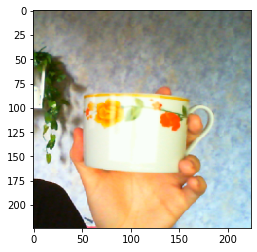

In [16]:
from PIL import Image
import os
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

image = Image.open('data/tipo1/0.png')
plt.imshow(image)

In [17]:
from keras import preprocessing

img = preprocessing.image.load_img('./data/tipo1/0.png', target_size=(299, 299))
x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
predictions = model.predict(x)
labels = inception_v3.decode_predictions(predictions, top=3)[0]

labels

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[('n07930864', 'cup', 0.5586348),
 ('n03063599', 'coffee_mug', 0.26852074),
 ('n07920052', 'espresso', 0.024553)]

In [55]:
import time 

camera = cv2.VideoCapture(2)
camera_height = 500

while(True):
    _, frame = camera.read()
    frame = cv2.flip(frame, 1)
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))


    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    roi = cv2.resize(roi, (399, 399))
    roi = inception_v3.preprocess_input(roi)

    # Pegando os valores de retorno da rede
    roi2 = np.array([cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)])
    predictions = model.predict(roi2)
    labels = inception_v3.decode_predictions(predictions, top=3)[0]

    # OBJETO 1
    label_1 = '{} - {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_1, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 150), 2)

    # OBJETO 2
    label_2 = '{} - {}%'.format(labels[1][1], int(labels[1][2]*100))
    cv2.putText(frame, label_2, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 240), 2)

    # OBJETO 3
    label_3 = '{} - {}%'.format(labels[2][1], int(labels[2][2]*100))
    cv2.putText(frame, label_3, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 20, 240), 2)


    cv2.imshow("Detectando objetos", frame)
    key = cv2.waitKey(1)
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

## Nosso treinamento

In [33]:
import os
import random
from glob import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline

In [34]:
class_names = ['NONE','CANECA', 'CARTEIRA']

In [35]:
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []

In [36]:
while(True):
    _, frame = camera.read()
    frame = cv2.flip(frame, 1)
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame, (res, camera_height))

    cv2.rectangle(frame, (300, 75), (650, 425), (255, 0, 255), 6)

    cv2.imshow("Capturing frames", frame)
    key = cv2.waitKey(1)

    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        # save the frame
        raw_frames_type_3.append(frame)
        print('3 key pressed - Saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        # save the frame
        raw_frames_type_4.append(frame)
        print('4 key pressed - Saved TYPE_4 frame')

camera.release()
cv2.destroyAllWindows()

In [37]:
save_width = 399
save_height = 399

In [38]:
for i in range(1, 5):
    name = './data/images_type_{}'.format(i)
    os.makedirs(name, exist_ok=True)

In [39]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_1/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_2/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_3/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_4/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [40]:
width = 96
height = 96

In [41]:
import os
import random
from glob import glob
from keras import preprocessing

In [42]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.png')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

### treinamento

In [43]:
images_type_1 = load_images('./data/images_type_1')
images_type_2 = load_images('./data/images_type_2')
images_type_3 = load_images('./data/images_type_3')
images_type_4 = load_images('./data/images_type_4')

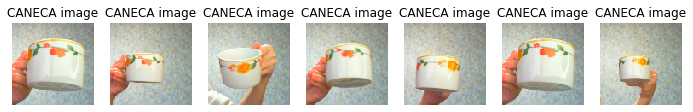

In [48]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

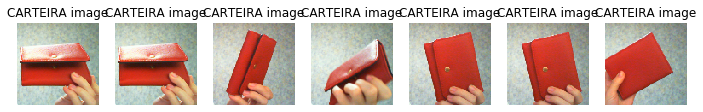

In [47]:
plt.figure(figsize=(12,8))

for i in range(7):
    plt.subplot(1, 7, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_3))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[2]))

# show the plot
plt.show()

In [104]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)

(10, 96, 96, 3)
(10, 96, 96, 3)
(10, 96, 96, 3)


In [105]:
X = np.concatenate((X_type_1, X_type_2, X_type_3), axis=0)

In [106]:
X = X / 255.

X.shape

(30, 96, 96, 3)

In [107]:
from keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]
y_type_4 = [3 for item in enumerate(X_type_4)]

y = np.concatenate((y_type_1, y_type_2, y_type_3, y_type_4), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(30, 3)


In [108]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [109]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [110]:
epochs = 20

In [111]:
model.fit(X, y, epochs=epochs)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 3ms/step - loss: 1.1616 - accuracy: 0.2667
Epoch 2/20
1/1 [==============================] - 0s 3ms/step - loss: 7.8835 - accuracy: 0.3333
Epoch 3/20
1/1 [==============================] - 0s 2ms/step - loss: 4.9519 - accuracy: 0.5333
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 5.1491 - accuracy: 0.3333
Epoch 5/20
1/1 [==============================] - 0s 3ms/step - loss: 2.0068 - accuracy: 0.3333
Epoch 6/20
1/1 [==============================] - 0s 5ms/step - loss: 1.7909 - accuracy: 0.4000
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 1.8372 - accuracy: 0.3667
Epoch 8/20
1/1 [=================

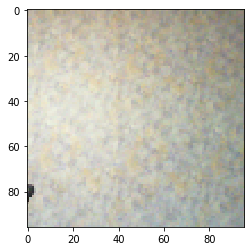

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
The type predicted is: NONE


In [112]:
type_1 = preprocessing.image.load_img('./data/images_type_1/0.png',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

In [122]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (255, 0, 255), 6)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize
    roi = cv2.resize(roi, (width, height))
    
    # predict!
    roi_X = np.expand_dims(roi, axis=0)
    print(roi_X)

    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred = predictions[0]
    
    print(predictions)

    # add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, tipe_3_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)



    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

[[[[159 158 150]
   [153 159 148]
   [174 167 163]
   ...
   [112 123 107]
   [119 121 100]
   [116 119 114]]

  [[166 158 159]
   [170 168 154]
   [176 173 165]
   ...
   [129 128 108]
   [137 123 103]
   [121 118 111]]

  [[165 161 152]
   [180 172 156]
   [176 176 165]
   ...
   [119 123 119]
   [114 127 112]
   [127 122  99]]

  ...

  [[216 209 186]
   [221 208 189]
   [219 210 179]
   ...
   [126 142 134]
   [133 142 139]
   [136 148 144]]

  [[215 208 185]
   [213 208 177]
   [216 206 178]
   ...
   [132 139 146]
   [136 142 134]
   [140 145 143]]

  [[218 205 190]
   [222 208 187]
   [223 212 191]
   ...
   [131 134 130]
   [131 141 131]
   [136 142 148]]]]
[[1.000000e+00 1.403766e-12 0.000000e+00]]
[[[[169 158 141]
   [164 158 148]
   [173 167 148]
   ...
   [121 121 116]
   [117 119 103]
   [123 118 108]]

  [[165 157 154]
   [169 170 161]
   [176 176 158]
   ...
   [124 127 127]
   [129 124 119]
   [113 118 114]]

  [[167 159 153]
   [186 170 149]
   [180 175 149]
   ...
   

[[1.0000000e+00 3.2551466e-14 0.0000000e+00]]
[[[[212 210 196]
   [208 211 198]
   [223 218 201]
   ...
   [162 164 147]
   [166 160 145]
   [167 165 147]]

  [[208 211 199]
   [218 219 207]
   [222 224 206]
   ...
   [174 172 163]
   [176 171 149]
   [172 159 143]]

  [[215 213 198]
   [223 223 206]
   [223 225 201]
   ...
   [168 167 148]
   [180 171 137]
   [169 169 139]]

  ...

  [[245 245 227]
   [247 247 228]
   [247 245 224]
   ...
   [175 189 180]
   [177 191 192]
   [183 201 199]]

  [[246 245 226]
   [247 244 224]
   [249 242 227]
   ...
   [169 189 189]
   [181 189 194]
   [188 196 191]]

  [[246 244 224]
   [246 246 226]
   [247 250 237]
   ...
   [175 181 184]
   [173 189 195]
   [171 194 173]]]]
[[1.0000000e+00 3.2551466e-14 0.0000000e+00]]
[[[[211 208 197]
   [210 211 195]
   [221 217 204]
   ...
   [160 163 150]
   [164 164 137]
   [164 164 136]]

  [[212 211 202]
   [218 217 210]
   [226 224 201]
   ...
   [166 175 150]
   [164 175 131]
   [149 162 136]]

  [[217 212 

[[[[205 210 193]
   [204 212 204]
   [220 219 194]
   ...
   [162 163 143]
   [159 161 140]
   [172 164 142]]

  [[212 212 204]
   [217 218 202]
   [217 224 201]
   ...
   [167 174 155]
   [162 173 148]
   [157 163 137]]

  [[209 213 201]
   [220 223 209]
   [218 225 202]
   ...
   [168 166 155]
   [173 170 149]
   [165 168 153]]

  ...

  [[247 246 230]
   [248 248 232]
   [248 251 241]
   ...
   [168 189 188]
   [172 192 193]
   [180 200 196]]

  [[248 254 245]
   [249 254 248]
   [249 254 248]
   ...
   [171 189 184]
   [166 193 186]
   [170 199 183]]

  [[249 254 248]
   [249 254 248]
   [249 254 248]
   ...
   [169 183 181]
   [171 189 188]
   [171 194 192]]]]
[[1.000000e+00 3.521909e-14 0.000000e+00]]
[[[[194 198 189]
   [194 201 193]
   [207 209 193]
   ...
   [155 153 129]
   [154 149 129]
   [153 151 131]]

  [[197 201 193]
   [205 208 188]
   [210 215 202]
   ...
   [161 163 132]
   [163 159 123]
   [154 146 134]]

  [[202 203 189]
   [208 214 193]
   [214 216 191]
   ...
   

[[1.0000000e+00 1.8948834e-13 0.0000000e+00]]
[[[[191 190 178]
   [197 191 178]
   [199 202 185]
   ...
   [141 144 127]
   [140 143 128]
   [144 145 121]]

  [[192 193 184]
   [201 203 186]
   [204 209 187]
   ...
   [157 153 133]
   [153 152 127]
   [143 142 125]]

  [[195 196 178]
   [207 206 184]
   [207 209 185]
   ...
   [143 147 145]
   [148 149 132]
   [139 154 118]]

  ...

  [[239 233 203]
   [241 233 208]
   [243 238 220]
   ...
   [158 170 157]
   [155 171 158]
   [170 179 173]]

  [[243 245 228]
   [250 249 239]
   [249 254 248]
   ...
   [151 170 164]
   [157 171 162]
   [167 177 164]]

  [[248 253 245]
   [249 254 248]
   [249 254 248]
   ...
   [150 165 162]
   [149 173 165]
   [151 175 159]]]]
[[1.0000000e+00 1.5433057e-13 0.0000000e+00]]
[[[[190 192 175]
   [188 192 178]
   [203 200 181]
   ...
   [142 146 131]
   [149 140 129]
   [147 145 124]]

  [[194 193 178]
   [200 202 182]
   [207 209 181]
   ...
   [146 157 136]
   [145 151 132]
   [136 144 125]]

  [[195 195 

[[1.0000000e+00 3.9481618e-13 0.0000000e+00]]
[[[[180 186 169]
   [184 188 171]
   [200 197 174]
   ...
   [135 142 117]
   [140 138 122]
   [147 138 115]]

  [[183 187 180]
   [193 196 184]
   [200 204 176]
   ...
   [143 150 124]
   [146 147 131]
   [137 140 121]]

  [[183 190 175]
   [199 203 179]
   [209 204 180]
   ...
   [133 146 128]
   [144 147 116]
   [137 146 113]]

  ...

  [[235 229 201]
   [236 229 206]
   [235 228 205]
   ...
   [146 166 160]
   [151 168 163]
   [156 176 161]]

  [[235 228 206]
   [235 231 206]
   [235 235 218]
   ...
   [144 165 158]
   [144 168 156]
   [155 172 156]]

  [[236 237 219]
   [242 244 229]
   [243 250 236]
   ...
   [143 162 151]
   [151 165 162]
   [147 172 160]]]]
[[1.000000e+00 3.444436e-13 0.000000e+00]]
[[[[178 180 171]
   [182 183 168]
   [192 192 170]
   ...
   [130 139 118]
   [132 134 116]
   [138 137 112]]

  [[185 183 173]
   [194 190 185]
   [196 199 165]
   ...
   [137 146 122]
   [142 144 119]
   [130 135 116]]

  [[189 185 170

[[1.000000e+00 7.186329e-13 0.000000e+00]]
[[[[173 182 166]
   [176 185 173]
   [194 192 173]
   ...
   [138 137 123]
   [136 133 116]
   [131 138 114]]

  [[182 183 167]
   [189 192 169]
   [198 199 172]
   ...
   [142 148 123]
   [135 145 126]
   [127 133 113]]

  [[188 185 172]
   [203 194 180]
   [203 198 179]
   ...
   [133 139 124]
   [140 144 124]
   [135 141 124]]

  ...

  [[227 222 198]
   [229 225 199]
   [230 225 201]
   ...
   [140 162 148]
   [142 165 155]
   [156 173 157]]

  [[229 223 201]
   [229 224 198]
   [228 226 203]
   ...
   [149 158 157]
   [141 162 161]
   [146 170 156]]

  [[228 223 200]
   [229 231 206]
   [234 237 221]
   ...
   [134 154 143]
   [136 162 146]
   [144 163 154]]]]
[[1.000000e+00 7.186329e-13 0.000000e+00]]
[[[[175 182 168]
   [173 181 176]
   [191 193 174]
   ...
   [123 139 119]
   [129 136 119]
   [133 136 119]]

  [[182 184 168]
   [189 192 171]
   [190 199 173]
   ...
   [140 144 130]
   [135 142 123]
   [131 136 119]]

  [[180 186 168]
 

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [115]:
model.save('cnn_model.h5')

In [116]:
import cv2
import numpy as np

In [117]:
from keras.models import load_model

In [118]:
class_names = ['NONE','CANECA', 'CARTEIRA']
width = 96
height = 96

In [119]:
model = load_model('cnn_model.h5')

In [120]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [124]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (255, 0, 255), 6)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize
    roi = cv2.resize(roi, (width, height))
    
    # predict!
    roi_X = np.expand_dims(roi, axis=0)

    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred = predictions[0]

    # add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, tipe_3_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)    


    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()